In [182]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [183]:
pd.set_option('display.max_column',None)

In [184]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv',)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [185]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [186]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [187]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv',index_col=0)
df.replace('?',np.nan,inplace=True)
df.dropna(subset=['price'],inplace=True)

In [188]:
X,y=df.drop(columns='price'),df['price'].astype(int)

In [189]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
ord_cols = []
hot_encode_cols = []
for col in X[cat_cols]:
    count = X[col].nunique()
    if count <= 2:
        ord_cols.append(col)
    else:
        hot_encode_cols.append(col)
        print(f'{col},{count}')
print(num_cols)
print(ord_cols)
print(hot_encode_cols)

normalized-losses,51
make,22
body-style,5
drive-wheels,3
engine-type,6
num-of-cylinders,7
fuel-system,8
bore,38
stroke,36
horsepower,58
peak-rpm,22
['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
['normalized-losses', 'make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']


In [190]:
num_cols=['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
hot_encode_cols=['make', 'body-style','drive-wheels','num-of-cylinders', 'fuel-system']

In [191]:
num_pipeline=Pipeline([
('imputer',SimpleImputer()),
('scaler',StandardScaler())
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [192]:
ord_pipeline=Pipeline([
('imputer',SimpleImputer(strategy='most_frequent')),
('encode',OrdinalEncoder())
])
ord_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encode', OrdinalEncoder())])

In [193]:
OneHotEncoder_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first',sparse=False)),
])
OneHotEncoder_pipeline


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encode', OneHotEncoder(drop='first', sparse=False))])

In [194]:
preprocessor=ColumnTransformer([
    ('ord', ord_pipeline, ord_cols),
    ('hot', OneHotEncoder_pipeline, hot_encode_cols),
    ('num', num_pipeline, num_cols),
])
preprocessor

ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['fuel-type', 'aspiration', 'num-of-doors',
                                  'engine-location']),
                                ('hot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['make', 'body-style', 'drive-wheels',
                                  'num-of-cylinders', 'fuel-system']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['symboling', 'wheel-base', 'length', 'width',
                                  'height', 'curb-weight', 'engine-size',
                                  'compression-ratio', 'city-mpg',
                                  'highway-mpg'])])

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

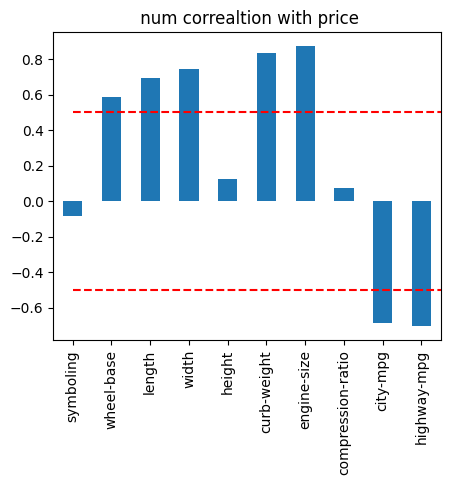

In [196]:
# for finding relation b?w 
fig = X[num_cols].astype(int).corrwith(y).plot(kind='bar',figsize=(5,4),title=' num correaltion with price')
fig.hlines(.5,0,15,linestyles='dashed',color='r')
fig.hlines(-.5,0,15,linestyles='dashed',color='r')
plt.show()

ConversionError: Failed to convert value(s) to axis units: ''

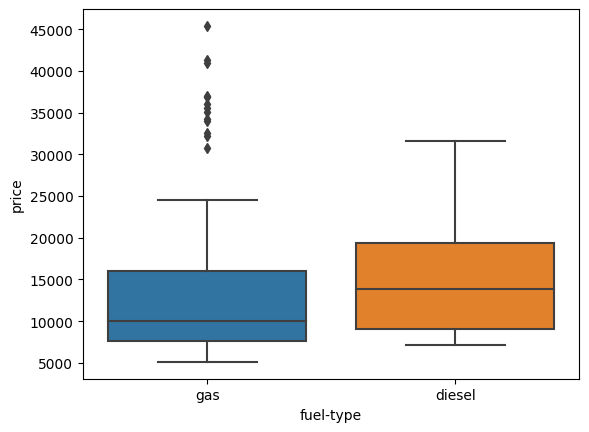

In [197]:
 for cols in X[ord_cols + hot_encode_cols]:
    sns.boxplot(x=X[cols],y=y)
    plt.xticks('')
    plt.show()

In [ ]:
from statsmodels.regression.linear_model import OLS

In [198]:
X=num_pipeline.fit_transform(X[num_cols])
o1=OLS(y.values,X).fit()
o1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.216
Model:                            OLS   Adj. R-squared (uncentered):              0.175
Method:                 Least Squares   F-statistic:                              5.257
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                    8.03e-07
Time:                        15:13:56   Log-Likelihood:                         -2198.9
No. Observations:                 201   AIC:                                      4418.
Df Residuals:                     191   BIC:                                      4451.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           265.2258   1356.276      0.196      0.845   -2409.977    2940.428
x2            36.1706   2758.028      0.013      0.990   -5403.935    5476.276
x3         -1377.5085   3042.415     -0.453      0.651   -7378.556    4623.539
x4          1461.9947   2389.067      0.612      0.541   -3250.349    6174.339
x5           560.4367   1466.529      0.382      0.703   -2332.237    3453.110
x6           981.1132   3812.178      0.257      0.797   -6538.263    8500.489
x7          4829.5432   2100.128      2.300      0.023     687.120    8971.966
x8           764.2685   1443.396      0.529      0.597   -2082.776    3611.313
x9         -3129.5749   4912.144     -0.637      0.525   -1.28e+04    6559.443
x10         1414.6821   4880.627      0.290      0.772   -8212.169     1.1e+04
==============================================================================
Omnibus:                       35.544   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.242
Skew:                           0.781   Prob(JB):                     3.09e-19
Kurtosis:                       5.782   Cond. No.                         16.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""